# Problem statement 1: Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [2]:
fraud =pd.read_csv("Fraud_check.csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
# we have to convert yes and no data to the 1 and 0 from 1st and last column and also from the marital status column
# add one more column to this as risk having yes or no or zero or one using the <=30000 as given in problem

In [4]:
fraud.rename(columns={'Undergrad':'undergrad','Marital.Status':'maritalstatus','Taxable.Income':'taxableincome','City.Population':'citypop','Work.Experience':'workexp'},inplace=True)

In [5]:
fraud

,undergrad,maritalstatus,taxableincome,citypop,workexp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
fraud.undergrad.replace(('NO','YES'),(0,1),inplace=True)
fraud.Urban.replace(('NO','YES'),(0,1),inplace=True)
fraud.maritalstatus.replace(('Single','Married','Divorced'),(0,1,2),inplace=True)

In [7]:
fraud.isna().sum()

undergrad        0
maritalstatus    0
taxableincome    0
citypop          0
workexp          0
Urban            0
dtype: int64

In [8]:
fraud

,undergrad,maritalstatus,taxableincome,citypop,workexp,Urban
0,0,0,68833,50047,10,1
1,1,2,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,0,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,2,76340,39492,7,1
596,1,2,69967,55369,2,1
597,0,2,47334,154058,0,1
598,1,1,98592,180083,17,0


In [9]:
l1=[]
for i in list(fraud.taxableincome):
    if i <30000:
        l1.append('Risky')
    elif i==30000:
        l1.append('Risky')
    else:
        l1.append('Good')

In [10]:
fraud['Risk']=pd.DataFrame(l1)
fraud

,undergrad,maritalstatus,taxableincome,citypop,workexp,Urban,Risk
0,0,0,68833,50047,10,1,Good
1,1,2,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,0,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,2,76340,39492,7,1,Good
596,1,2,69967,55369,2,1,Good
597,0,2,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [11]:
le=preprocessing.LabelEncoder()
fraud['Risk'] = le.fit_transform(fraud.Risk)

In [12]:
fraud

,undergrad,maritalstatus,taxableincome,citypop,workexp,Urban,Risk
0,0,0,68833,50047,10,1,0
1,1,2,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,0,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,2,76340,39492,7,1,0
596,1,2,69967,55369,2,1,0
597,0,2,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [13]:
fraud.Risk.value_counts()

0    476
1    124
Name: Risk, dtype: int64

In [14]:
x=fraud.iloc[0::,0:6:1]
x

,undergrad,maritalstatus,taxableincome,citypop,workexp,Urban
0,0,0,68833,50047,10,1
1,1,2,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,0,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,2,76340,39492,7,1
596,1,2,69967,55369,2,1
597,0,2,47334,154058,0,1
598,1,1,98592,180083,17,0


In [15]:
y=fraud.iloc[0::,6:7:]
y

,Risk
0,0
1,0
2,0
3,0
4,0
...,...
595,0
596,0
597,0
598,0


In [16]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2)

In [17]:
ytest

,Risk
264,0
200,0
236,0
485,0
486,0
...,...
556,0
108,0
151,0
134,0


In [18]:
fraudmodel = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=5)
fraudmodel1 = fraudmodel.fit(xtrain,ytrain)

[Text(0.5, 0.75, 'taxableincome <= 30055.5\ngini = 0.312\nsamples = 480\nvalue = [387, 93]\nclass = Risky'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 93\nvalue = [0, 93]\nclass = Good'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 387\nvalue = [387, 0]\nclass = Risky')]

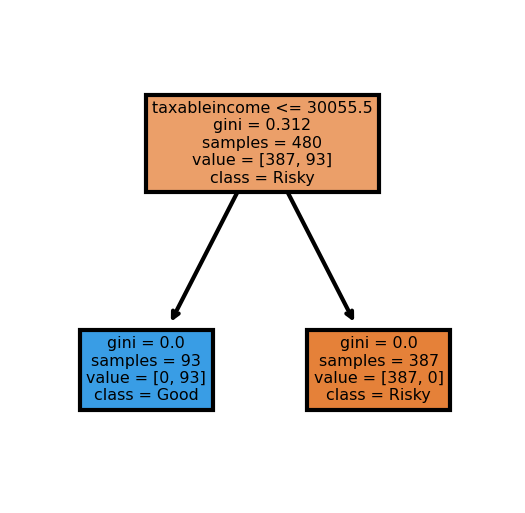

In [19]:
fn=['undergrad','maritalstatus','taxableincome','citypop','workexp','Urban']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(fraudmodel1,feature_names=fn,class_names=cn,filled=True)

In [20]:
ypreds = fraudmodel1.predict(xtest)

In [21]:
metrics.accuracy_score(ytest,ypreds)

1.0

In [22]:
# So our model is 100% accurate on the test data

In [23]:
#Since we are given task of computing only based on taxable income so making tree seperately for taxable income vs risk column
x2=fraud.iloc[0::,2:3:]
x2

,taxableincome
0,68833
1,33700
2,36925
3,50190
4,81002
...,...
595,76340
596,69967
597,47334
598,98592


In [24]:
xtrain2,xtest2,ytrain2,ytest2= train_test_split(x2,y,test_size=0.2)

In [25]:
xtrain2

,taxableincome
461,88613
178,86958
255,38143
576,50242
246,49995
...,...
547,92819
24,38239
556,42063
416,64230


In [26]:
fraudmodel2 = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=5)
fraudmodel22 = fraudmodel2.fit(xtrain2,ytrain2)

[Text(0.5, 0.75, 'taxableincome <= 30055.5\ngini = 0.32\nsamples = 480\nvalue = [384, 96]\nclass = Risky'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 96\nvalue = [0, 96]\nclass = Good'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 384\nvalue = [384, 0]\nclass = Risky')]

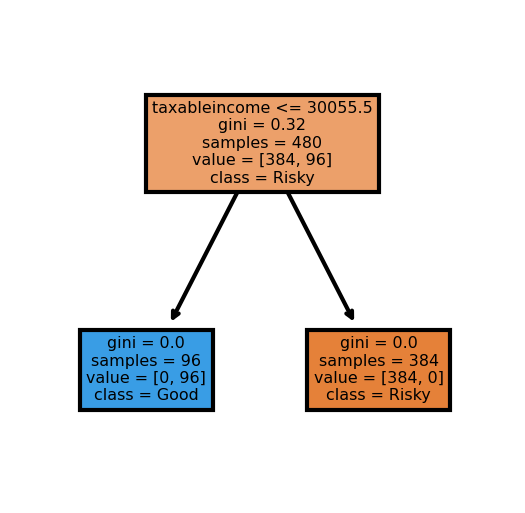

In [27]:
fn2=['taxableincome']
cn2=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(fraudmodel22,feature_names=fn2,class_names=cn2,filled=True)

In [28]:
ypreds2= fraudmodel22.predict(xtest2)

In [29]:
metrics.accuracy_score(ytest2,ypreds2)

1.0

In [30]:
# So this model is also giving accuracy of 100% so we can use any model either fraudmodel1 or fraudmodel22

# Problem Statement 2: A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [2]:
# so here Sales is y variable and all other are x variable and we have to find variable which causes high sales

In [3]:
company= pd.read_csv("Company_Data.csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
company.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [5]:
company.ShelveLoc.replace(('Bad','Medium','Good'),(0,1,2),inplace=True)
company.Urban.replace(('No','Yes'),(0,1),inplace=True)
company.US.replace(('No','Yes'),(0,1),inplace=True)

In [6]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1
396,6.14,139,23,3,37,120,1,55,11,0,1
397,7.41,162,26,12,368,159,1,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [11]:
# Sales need to be in the categorical variable and how to convert this into two category i.e high and low

In [12]:
# First categories the sales into two groups i.e. high and low based on less than 10 and greater than 10
# make it the seperate new column added to our data and delete old column

In [14]:
l5=[]
for i in list(company.Sales):
    if i <10:
        l5.append('low')
    elif i==10:
        l5.append('high')
    else:
        l5.append('high')

In [16]:
company['Sales']=pd.DataFrame(l5)
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,low,138,73,11,276,120,0,42,17,1,1
1,high,111,48,16,260,83,2,65,10,1,1
2,high,113,35,10,269,80,1,59,12,1,1
3,low,117,100,4,466,97,1,55,14,1,1
4,low,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,2,33,14,1,1
396,low,139,23,3,37,120,1,55,11,0,1
397,low,162,26,12,368,159,1,40,18,1,1
398,low,100,79,7,284,95,0,50,12,1,1


In [17]:
company.Sales.value_counts()

low     321
high     79
Name: Sales, dtype: int64

In [18]:
x= company.iloc[0::,1:11:]
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,1,55,11,0,1
397,162,26,12,368,159,1,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [19]:
y= company.iloc[0::,0:1:]
y

,Sales
0,low
1,high
2,high
3,low
4,low
...,...
395,high
396,low
397,low
398,low


In [22]:
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.2)

In [47]:
xtrain

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
323,107,105,18,428,103,1,34,12,1,1
12,122,35,2,393,136,1,62,18,1,0
146,114,83,0,412,131,0,39,14,1,0
183,118,74,6,426,102,1,80,18,1,1
147,140,54,9,402,119,2,41,16,0,1
...,...,...,...,...,...,...,...,...,...,...
167,106,73,0,216,93,1,60,13,1,0
346,132,107,0,144,125,1,33,13,0,0
176,138,107,9,480,154,1,47,11,0,1
70,89,81,15,237,99,2,74,12,1,1


In [52]:
companymodel = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=5)
companymodel1 = companymodel.fit(xtrain,ytrain)

[Text(0.5035714285714286, 0.95, 'ShelveLoc <= 1.5\ngini = 0.312\nsamples = 320\nvalue = [62, 258]\nclass = high'),
 Text(0.25, 0.85, 'Price <= 88.0\ngini = 0.16\nsamples = 251\nvalue = [22, 229]\nclass = high'),
 Text(0.05714285714285714, 0.75, 'Age <= 30.5\ngini = 0.48\nsamples = 25\nvalue = [10, 15]\nclass = high'),
 Text(0.02857142857142857, 0.65, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = low'),
 Text(0.08571428571428572, 0.65, 'CompPrice <= 100.5\ngini = 0.434\nsamples = 22\nvalue = [7, 15]\nclass = high'),
 Text(0.05714285714285714, 0.55, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]\nclass = high'),
 Text(0.11428571428571428, 0.55, 'ShelveLoc <= 0.5\ngini = 0.5\nsamples = 14\nvalue = [7, 7]\nclass = low'),
 Text(0.05714285714285714, 0.45, 'Price <= 75.0\ngini = 0.245\nsamples = 7\nvalue = [1, 6]\nclass = high'),
 Text(0.02857142857142857, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = low'),
 Text(0.08571428571428572, 0.35, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\ncl

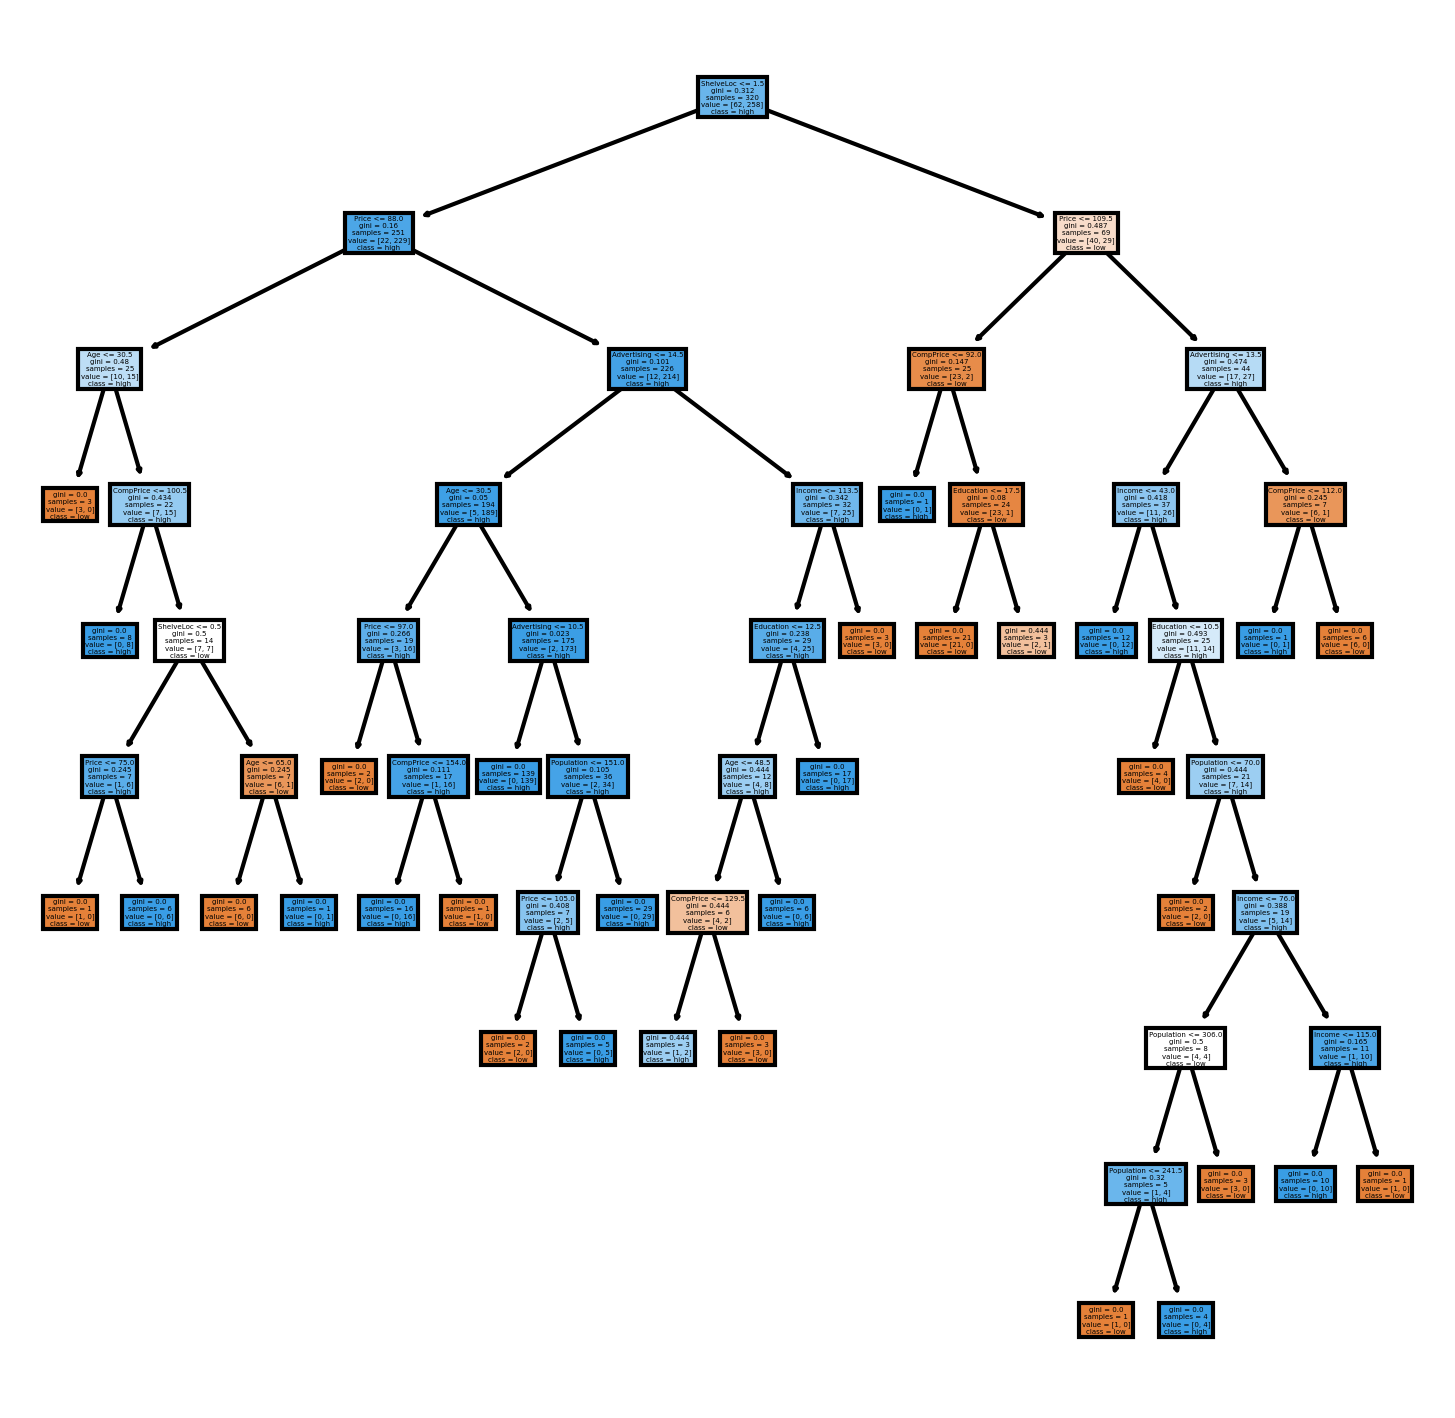

In [53]:
fn=['CompPrice', 'Income','Advertising','Population', 'Price','ShelveLoc','Age','Education','Urban','US']
cn=['low','high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)
tree.plot_tree(companymodel1,feature_names=fn,class_names=cn,filled=True)

In [50]:
ypredcomp= companymodel1.predict(xtest)

In [51]:
metrics.accuracy_score(ytest,ypredcomp)

0.8

In [55]:
#So our model for company sales has 80% accuracy